# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

os.makedirs("output_data", exist_ok=True)


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "4b0722390b2de9f2e1c9a8f16986dc9a"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rajgarh
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | tromso
Processing Record 5 of Set 1 | arroyo
Processing Record 6 of Set 1 | usinsk
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | christchurch
Processing Record 9 of Set 1 | ellsworth
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | guiuan
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | namtsy
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | manta
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | st. john's


Processing Record 39 of Set 4 | ugoofaaru
Processing Record 40 of Set 4 | kupang
Processing Record 41 of Set 4 | port mathurin
Processing Record 42 of Set 4 | san fernando de apure
Processing Record 43 of Set 4 | acarau
Processing Record 44 of Set 4 | mil'kovo
Processing Record 45 of Set 4 | baruun-urt
Processing Record 46 of Set 4 | lautoka
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | jinchang
Processing Record 0 of Set 5 | westport
Processing Record 1 of Set 5 | flin flon
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | konduga
Processing Record 4 of Set 5 | al mindak
Processing Record 5 of Set 5 | pacific grove
Processing Record 6 of Set 5 | vernon
Processing Record 7 of Set 5 | ouesso
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | porto-novo
Processing Record 10 of Set 5 | saint-philippe
Processing Record 11 of Set 5 | ilulissat
Processing Record 12 of Set 5 | chonchi
Pr

Processing Record 31 of Set 8 | zeya
Processing Record 32 of Set 8 | giado
Processing Record 33 of Set 8 | kununurra
Processing Record 34 of Set 8 | sal rei
Processing Record 35 of Set 8 | kroya
Processing Record 36 of Set 8 | hammerfest
Processing Record 37 of Set 8 | vershino-darasunskiy
Processing Record 38 of Set 8 | coaldale
Processing Record 39 of Set 8 | hoemul-li
Processing Record 40 of Set 8 | al kharijah
Processing Record 41 of Set 8 | lerwick
Processing Record 42 of Set 8 | susuman
Processing Record 43 of Set 8 | tolanaro
Processing Record 44 of Set 8 | navolato
Processing Record 45 of Set 8 | dolzhanskaya
Processing Record 46 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 47 of Set 8 | kalibo (poblacion)
Processing Record 48 of Set 8 | le thor
Processing Record 49 of Set 8 | oyonnax
Processing Record 0 of Set 9 | katsuura
Processing Record 1 of Set 9 | cleveland
Processing Record 2 of Set 9 | berdigestyakh
Processing Record 3 of Set 9 | qarqaraly


Processing Record 21 of Set 12 | pristen'
Processing Record 22 of Set 12 | devonport
Processing Record 23 of Set 12 | akhtyrskiy
Processing Record 24 of Set 12 | stepnogorsk
Processing Record 25 of Set 12 | as sulayyil
Processing Record 26 of Set 12 | kingston
Processing Record 27 of Set 12 | port hueneme
Processing Record 28 of Set 12 | sao gabriel da cachoeira
Processing Record 29 of Set 12 | orikhiv
Processing Record 30 of Set 12 | santo antonio do ica
Processing Record 31 of Set 12 | mareeba
Processing Record 32 of Set 12 | timmins
Processing Record 33 of Set 12 | shubarshi
Processing Record 34 of Set 12 | port blair
Processing Record 35 of Set 12 | pak phanang
Processing Record 36 of Set 12 | phan rang-thap cham
Processing Record 37 of Set 12 | berdychiv
Processing Record 38 of Set 12 | ciudad del carmen
Processing Record 39 of Set 12 | alice springs
Processing Record 40 of Set 12 | galliano
Processing Record 41 of Set 12 | kitgum
Processing Record 42 of Set 12 | sitka
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rajgarh,28.6333,75.3833,28.16,75,99,6.01,IN,1689478031
1,grytviken,-54.2811,-36.5092,-5.40,72,6,2.48,GS,1689478031
2,edinburgh of the seven seas,-37.0676,-12.3116,12.70,69,28,13.74,SH,1689478031
3,tromso,69.6496,18.9570,11.32,87,40,2.57,NO,1689478032
4,arroyo,41.6096,-4.7969,13.97,86,0,1.54,ES,1689478032


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rajgarh,28.6333,75.3833,28.16,75,99,6.01,IN,1689478031
1,grytviken,-54.2811,-36.5092,-5.40,72,6,2.48,GS,1689478031
2,edinburgh of the seven seas,-37.0676,-12.3116,12.70,69,28,13.74,SH,1689478031
3,tromso,69.6496,18.9570,11.32,87,40,2.57,NO,1689478032
4,arroyo,41.6096,-4.7969,13.97,86,0,1.54,ES,1689478032


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

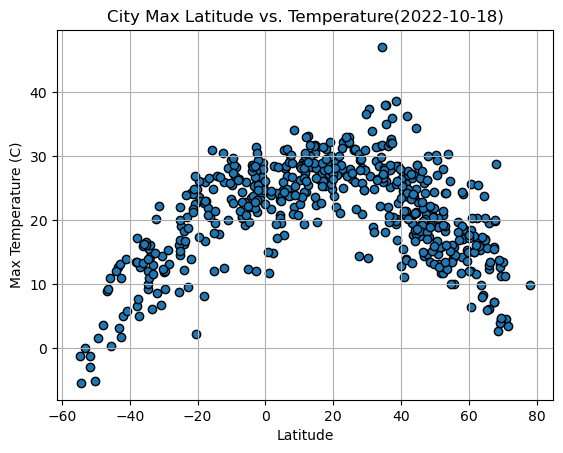

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

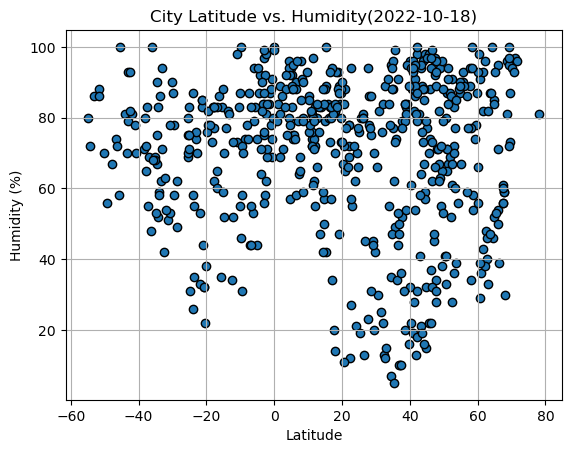

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

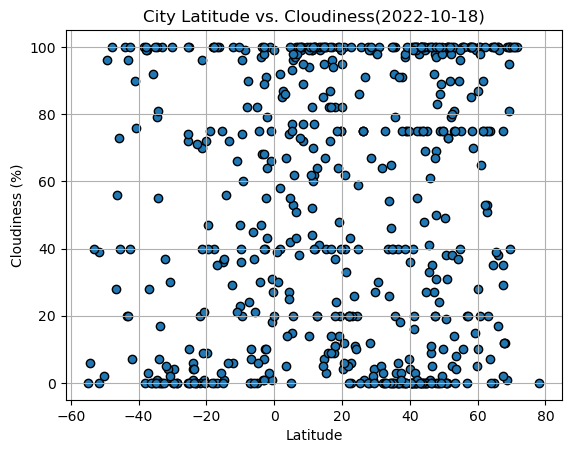

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

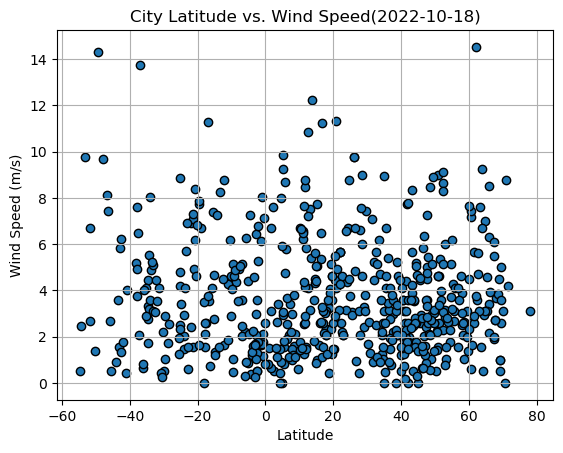

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, save_path):


SyntaxError: incomplete input (98888511.py, line 2)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_df["Lat"], northern_df["Max Temp"])

regression_line = slope * northern_df["Lat"] + intercept

plt.scatter(northern_df["Lat"], northern_df["Max Temp"])

plt.plot(northern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(northern_df["Lat"].min(), northern_df["Max Temp"].max(), equation_text, color='red', fontsize=12, ha='left', va='top')

r_value_text


In [ ]:
# Linear regression on Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]

slope, intercept, r_value, p_value, std_err = linregress(southern_df["Lat"], southern_df["Max Temp"])

regression_line = slope * southern_df["Lat"] + intercept

plt.scatter(southern_df["Lat"], southern_df["Max Temp"])

plt.plot(southern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(southern_df["Lat"].min(), southern_df["Max Temp"].max(), equation_text, color='red', fontsize=12, ha='left', va='top')

r_value_text

Discussion about the linear relationship:
1. For the Northern Hemisphere, as the latitude increases (moving towards the North Pole), the maximum temperature tends to decrease. The negative slope of the regression line (-0.24) indicates this inverse relationship.
2. In the Southern Hemisphere, as the latitude increases (moving towards the South Pole), the maximum temperature also tends to decrease. However, the positive slope of the regression line (-0.44) indicates a weaker relationship compared to the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_df["Lat"], northern_df["Humidity"])

regression_line = slope * northern_df["Lat"] + intercept

plt.scatter(northern_df["Lat"], northern_df["Humidity"])

plt.plot(northern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Humidity")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(northern_df["Lat"].min(), northern_df["Humidity"].min(), equation_text, color='red', fontsize=12, ha='left', va='bottom')

r_value_text

In [ ]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]

slope, intercept, r_value, p_value, std_err = linregress(southern_df["Lat"], southern_df["Humidity"])

regression_line = slope * southern_df["Lat"] + intercept

plt.scatter(southern_df["Lat"], southern_df["Humidity"])

plt.plot(southern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Humidity")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(southern_df["Lat"].min(), southern_df["Humidity"].min(), equation_text, color='red', fontsize=12, ha='left', va='bottom')

r_value_text

**Discussion about the linear relationship:
The analysis of the linear regression plots for humidity vs. latitude in both the Northern and Southern Hemispheres shows a very weak relationship between these variables. The calculated r-values indicate almost no correlation between latitude and humidity.Based on these results, it can be concluded that latitude alone is not a strong predictor of humidity levels in either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_df["Lat"], northern_df["Cloudiness"])

regression_line = slope * northern_df["Lat"] + intercept

plt.scatter(northern_df["Lat"], northern_df["Cloudiness"])

plt.plot(northern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(northern_df["Lat"].min(), northern_df["Cloudiness"].min(), equation_text, color='red', fontsize=12, ha='left', va='bottom')

r_value_text

In [ ]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]

slope, intercept, r_value, p_value, std_err = linregress(southern_df["Lat"], southern_df["Cloudiness"])

regression_line = slope * southern_df["Lat"] + intercept

plt.scatter(southern_df["Lat"], southern_df["Cloudiness"])

plt.plot(southern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(southern_df["Lat"].min(), southern_df["Cloudiness"].min(), equation_text, color='red', fontsize=12, ha='left', va='bottom')

r_value_text

**Discussion about the linear relationship:
The linear regression analysis for cloudiness vs. latitude in both the Northern and Southern Hemispheres reveals a very weak relationship between these variables. The calculated r-values of 0.0062 for the Northern Hemisphere and -0.0449 for the Southern Hemisphere suggest almost no correlation between latitude and cloudiness.From these results, we can conclude that latitude alone is not a reliable predictor of cloudiness levels in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_df["Lat"], northern_df["Wind Speed"])

regression_line = slope * northern_df["Lat"] + intercept

plt.scatter(northern_df["Lat"], northern_df["Wind Speed"])

plt.plot(northern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(northern_df["Lat"].min(), northern_df["Wind Speed"].min(), equation_text, color='red', fontsize=12, ha='left', va='bottom')

r_value_text

In [ ]:
# Southern Hemisphere
southern_df = city_data_df[city_data_df["Lat"] < 0]

slope, intercept, r_value, p_value, std_err = linregress(southern_df["Lat"], southern_df["Wind Speed"])

regression_line = slope * southern_df["Lat"] + intercept

plt.scatter(southern_df["Lat"], southern_df["Wind Speed"])

plt.plot(southern_df["Lat"], regression_line, color='red')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

r_value_text = "The r-value is: {:.4f}".format(r_value)

equation_text = "y = {:.2f}x + {:.2f}".format(slope, intercept)
plt.text(southern_df["Lat"].min(), southern_df["Wind Speed"].max(), equation_text, color='red', fontsize=12, ha='left', va='top')

r_value_text

**Discussion about the linear relationship:
The linear regression analysis for wind speed vs. latitude in both the Northern and Southern Hemispheres reveals a very weak relationship between these variables. The calculated r-values of -0.0798 for the Northern Hemisphere and -0.2327 for the Southern Hemisphere suggest a weak negative correlation between latitude and wind speed in both regions.
From these results, we can conclude that there is a generally weak negative correlation between latitude and wind speed in both the Northern and Southern Hemispheres. However, the correlations are not strong, indicating that latitude alone is not a reliable predictor of wind speed variations.